In [1]:
import imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# pip install plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline


C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_584\3909906367.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [5]:
data= pd.read_csv('CSV_data/bad_data_home_IR.csv')
df=pd.DataFrame(data)
df

,Unnamed: 0.1,Unnamed: 0,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district
0,0,0,320.0,0.0,1.0,55,7,1,1,1,0,1.657961e+09,استاد معین,320.0,9
1,1,1,300.0,0.1,3.0,45,13,1,0,1,1,1.657961e+09,آذربایجان,303.0,10
2,2,2,300.0,30.0,2.0,128,9,3,1,1,1,1.657961e+09,محمودیه,1300.0,1
3,3,3,600.0,18.0,8.0,132,16,2,1,1,1,1.657961e+09,فرمانیه,1200.0,1
4,4,4,200.0,11.0,2.0,105,7,2,1,1,1,1.657961e+09,شهران شمالی,566.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165113,165113,165113,1000.0,25.0,1.0,135,11,2,1,1,1,1.661164e+09,کامرانیه,1833.0,1
165114,165114,165114,2300.0,0.0,3.0,160,10,3,1,1,1,1.661164e+09,اقدسیه,2300.0,1
165115,165115,165115,350.0,0.0,3.0,92,30,2,0,0,1,1.661164e+09,زاهد گیلانی,350.0,13
165116,165116,165116,300.0,25.0,1.0,110,6,2,1,1,1,1.661164e+09,نیاوران,1133.0,1


In [6]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [7]:
check(df)

,column,dtypes,nunique,sum_null
0,Unnamed: 0.1,int64,165118,0
1,Unnamed: 0,int64,165118,0
2,deposit,float64,635,0
3,rent,float64,580,0
4,floor,float64,32,0
5,area,int64,436,0
6,age,int64,32,0
7,rooms,int64,5,0
8,elavator,int64,2,0
9,parking,int64,2,0


In [8]:
df1=df.copy()
df1=df1.sort_values('district')
df1

,Unnamed: 0.1,Unnamed: 0,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district
165117,165117,165117,2000.0,3.0,6.0,220,8,4,1,1,1,1.661164e+09,فرمانیه,2100.0,1
83092,83092,83092,350.0,35.0,1.0,50,6,1,1,1,0,1.659688e+09,زعفرانیه,1516.0,1
83090,83090,83090,750.0,28.0,0.0,190,31,2,0,0,0,1.659688e+09,الهیه,1683.0,1
30486,30486,30486,500.0,35.0,5.0,150,1,3,1,1,1,1.658830e+09,قیطریه,1666.0,1
83075,83075,83075,2700.0,0.0,6.0,240,14,3,1,1,1,1.659688e+09,زعفرانیه,2700.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68214,68214,68214,700.0,7.5,0.0,150,5,3,1,1,1,1.659450e+09,شهرک راه‌آهن,950.0,22
94301,94301,94301,300.0,12.0,12.0,107,6,2,1,1,1,1.660113e+09,دریاچه شهدای خلیج فارس,700.0,22
39894,39894,39894,500.0,12.0,2.0,140,6,3,1,1,1,1.658927e+09,شهرک راه‌آهن,900.0,22
94282,94282,94282,1500.0,30.0,18.0,170,1,3,1,1,1,1.660113e+09,دریاچه شهدای خلیج فارس,2500.0,22


In [9]:
out1=df1.loc[(df1.deposit==1) & (df1.rent == 0)]
out1

,Unnamed: 0.1,Unnamed: 0,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district
15499,15499,15499,1.0,0.0,4.0,117,13,2,1,1,1,1.658575e+09,قیطریه,1.0,1
125078,125078,125078,1.0,0.0,1.0,130,5,3,1,1,1,1.660540e+09,شهرک غرب,1.0,2
139126,139126,139126,1.0,0.0,4.0,125,0,3,1,1,1,1.660738e+09,دریان‌نو,1.0,2
101186,101186,101186,1.0,0.0,4.0,135,6,2,1,1,1,1.660199e+09,سعادت‌آباد,1.0,2
104189,104189,104189,1.0,0.0,1.0,100,9,2,1,1,1,1.660221e+09,سعادت‌آباد,1.0,2
104362,104362,104362,1.0,0.0,1.0,112,4,2,1,1,1,1.660222e+09,سعادت‌آباد,1.0,2
103052,103052,103052,1.0,0.0,6.0,130,3,2,1,1,1,1.660213e+09,اختیاریه,1.0,2
97933,97933,97933,1.0,0.0,3.0,170,11,3,1,1,1,1.660139e+09,پاسداران,1.0,3
76173,76173,76173,1.0,0.0,3.0,125,11,2,1,1,1,1.659557e+09,دروس,1.0,3
108147,108147,108147,1.0,0.0,0.0,11,1,0,1,1,1,1.660299e+09,تهرانپارس شرقی,1.0,4


In [10]:
df1=df1.drop(out1.index)

In [11]:
out3=df1.loc[df1.area<30]
out3

,Unnamed: 0.1,Unnamed: 0,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district
85317,85317,85317,50.0,3.0,0.0,20,3,1,1,0,1,1.659762e+09,اراج,150.0,1
31773,31773,31773,500.0,50.0,4.0,22,16,3,1,1,1,1.658837e+09,الهیه,2166.0,1
78695,78695,78695,400.0,14.5,3.0,9,13,2,1,1,1,1.659603e+09,قیطریه,883.0,1
60317,60317,60317,50.0,5.0,0.0,29,16,0,0,0,0,1.659336e+09,کامرانیه,216.0,1
55800,55800,55800,2500.0,0.0,3.0,15,5,3,1,1,1,1.659252e+09,الهیه,2500.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124701,124701,124701,5.0,1.5,0.0,10,0,0,0,0,0,1.660535e+09,چیتگر,55.0,21
124736,124736,124736,2.0,0.4,0.0,12,11,0,1,1,0,1.660536e+09,شهرک آزادی,15.0,21
72056,72056,72056,100.0,5.0,-1.0,20,31,0,0,0,0,1.659515e+09,تهران‌سر,266.0,21
42039,42039,42039,0.0,0.4,-1.0,20,6,0,1,1,0,1.658947e+09,شهرک راه‌آهن,13.0,22


In [12]:
df1=df1.drop(out3.index)


In [13]:
df1['per_area']=df1.apply(lambda r: float(r['all_to_deposit']/r['area']),axis=1)
df1

,Unnamed: 0.1,Unnamed: 0,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district,per_area
165117,165117,165117,2000.0,3.0,6.0,220,8,4,1,1,1,1.661164e+09,فرمانیه,2100.0,1,9.545455
83092,83092,83092,350.0,35.0,1.0,50,6,1,1,1,0,1.659688e+09,زعفرانیه,1516.0,1,30.320000
83090,83090,83090,750.0,28.0,0.0,190,31,2,0,0,0,1.659688e+09,الهیه,1683.0,1,8.857895
30486,30486,30486,500.0,35.0,5.0,150,1,3,1,1,1,1.658830e+09,قیطریه,1666.0,1,11.106667
83075,83075,83075,2700.0,0.0,6.0,240,14,3,1,1,1,1.659688e+09,زعفرانیه,2700.0,1,11.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68214,68214,68214,700.0,7.5,0.0,150,5,3,1,1,1,1.659450e+09,شهرک راه‌آهن,950.0,22,6.333333
94301,94301,94301,300.0,12.0,12.0,107,6,2,1,1,1,1.660113e+09,دریاچه شهدای خلیج فارس,700.0,22,6.542056
39894,39894,39894,500.0,12.0,2.0,140,6,3,1,1,1,1.658927e+09,شهرک راه‌آهن,900.0,22,6.428571
94282,94282,94282,1500.0,30.0,18.0,170,1,3,1,1,1,1.660113e+09,دریاچه شهدای خلیج فارس,2500.0,22,14.705882


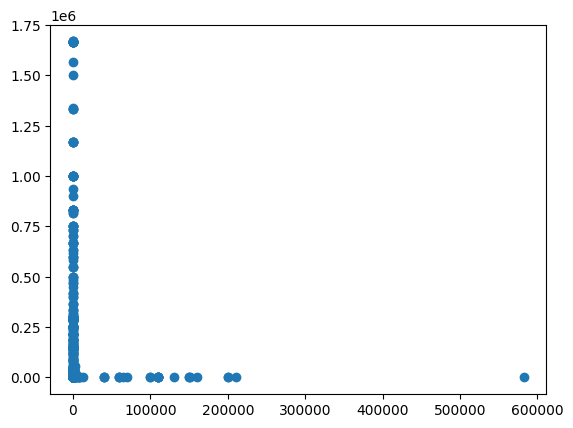

In [14]:
plt.scatter(df1.area,df1.all_to_deposit)

In [15]:
out2=df1.loc[df1.area>500000]
out2

,Unnamed: 0.1,Unnamed: 0,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district,per_area
119064,119064,119064,250.0,3.8,3.0,582500,15,1,0,0,1,1.660459e+09,هفت حوض,376.0,8,0.000645


In [16]:
df1=df1.drop(out2.index)


In [17]:
le=LabelEncoder()
df1['address']= le.fit_transform(df1['region'])
region=df1.pop('region')
time=df1.pop('time')
Unnamed=df1.pop('Unnamed: 0')
df1

,Unnamed: 0.1,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,all_to_deposit,district,per_area,address
165117,165117,2000.0,3.0,6.0,220,8,4,1,1,1,2100.0,1,9.545455,247
83092,83092,350.0,35.0,1.0,50,6,1,1,1,0,1516.0,1,30.320000,137
83090,83090,750.0,28.0,0.0,190,31,2,0,0,0,1683.0,1,8.857895,29
30486,30486,500.0,35.0,5.0,150,1,3,1,1,1,1666.0,1,11.106667,258
83075,83075,2700.0,0.0,6.0,240,14,3,1,1,1,2700.0,1,11.250000,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68214,68214,700.0,7.5,0.0,150,5,3,1,1,1,950.0,22,6.333333,192
94301,94301,300.0,12.0,12.0,107,6,2,1,1,1,700.0,22,6.542056,123
39894,39894,500.0,12.0,2.0,140,6,3,1,1,1,900.0,22,6.428571,192
94282,94282,1500.0,30.0,18.0,170,1,3,1,1,1,2500.0,22,14.705882,123


In [15]:
temp = df1.describe()
temp.style.background_gradient(cmap='Oranges')

,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,all_to_deposit,district,per_area,address
count,164862.000000,164862.000000,164862.000000,164862.000000,164862.000000,164862.000000,164862.000000,164862.000000,164862.000000,164862.000000,164862.000000,164862.000000,164862.000000
mean,702.012107,33.828305,3.179144,133.730035,9.838131,2.157119,0.764530,0.849140,0.891455,1829.406067,5.658017,14.083827,183.779397
std,1006.262983,736.672740,2.557606,1461.623889,6.969287,0.772434,0.424293,0.357913,0.311069,24580.238459,5.548579,171.360917,102.346100
min,0.000000,0.000000,-1.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.002530,0.000000
25%,250.000000,0.000000,2.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,493.000000,2.000000,6.066949,90.000000
50%,480.000000,7.000000,3.000000,105.000000,9.000000,2.000000,1.000000,1.000000,1.000000,800.000000,4.000000,7.963235,161.000000
75%,800.000000,18.000000,4.000000,140.000000,15.000000,3.000000,1.000000,1.000000,1.000000,1366.000000,7.000000,10.440000,292.000000
max,50000.000000,50000.000000,30.000000,210170.000000,31.000000,4.000000,1.000000,1.000000,1.000000,1668166.000000,22.000000,13337.328000,342.000000


In [ ]:
g1 = [go.Box(y=df1.rooms,name="rooms",marker=dict(color="rgba(51,0,0,0.9)"),hoverinfo="name+y")]
g2 = [go.Box(y=df1.floor,name="floor",marker=dict(color="rgba(0,102,102,0.9)"),hoverinfo="name+y")]
g3 = [go.Box(y=df1.age,name="age",marker=dict(color="rgba(9,80,58,12.2)"),hoverinfo="name+y")]
layout2 = go.Layout(title="Houses",yaxis=dict(range=[0,13])) 
fig2 = go.Figure(data=g1+g2+g3,layout=layout2)
iplot(fig2)


In [ ]:
fig2 = px.histogram(df1,x='district',color='district',template='plotly_dark')
fig2.show()

In [ ]:
fig2 = px.histogram(df1,x='rooms',color='rooms',template='plotly_dark')
fig2.show()

In [ ]:
fig2 = px.histogram(df1,x='floor',color='floor',template='plotly_dark')
fig2.show()

In [18]:
out4=df1.loc[df1.floor<0]
df1=df1.drop(out4.index)

In [ ]:
fig2 = px.histogram(df1,x='age',color='age',template='plotly_dark')
fig2.show()

In [ ]:
fig2 = px.histogram(df1,x='parking',color='parking',template='plotly_dark')
fig2.show()

In [ ]:
fig2 = px.histogram(df1,x='Warehouse',color='Warehouse',template='plotly_dark')
fig2.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.distplot(df1['deposit'])
plt.xticks(np.arange(df1['deposit'].min(), df1['deposit'].max(), step=3000))

In [ ]:
sns.countplot(data=df1,x="district",hue='parking')
sns.set(rc={'figure.figsize':(20,15)})
plt.xticks(rotation=90)
plt.show()

C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_7372\1924285441.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Abolfazl\AppData\Local\Temp\ipykernel_7372\1924285441.py:8: UserWarning:

Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14



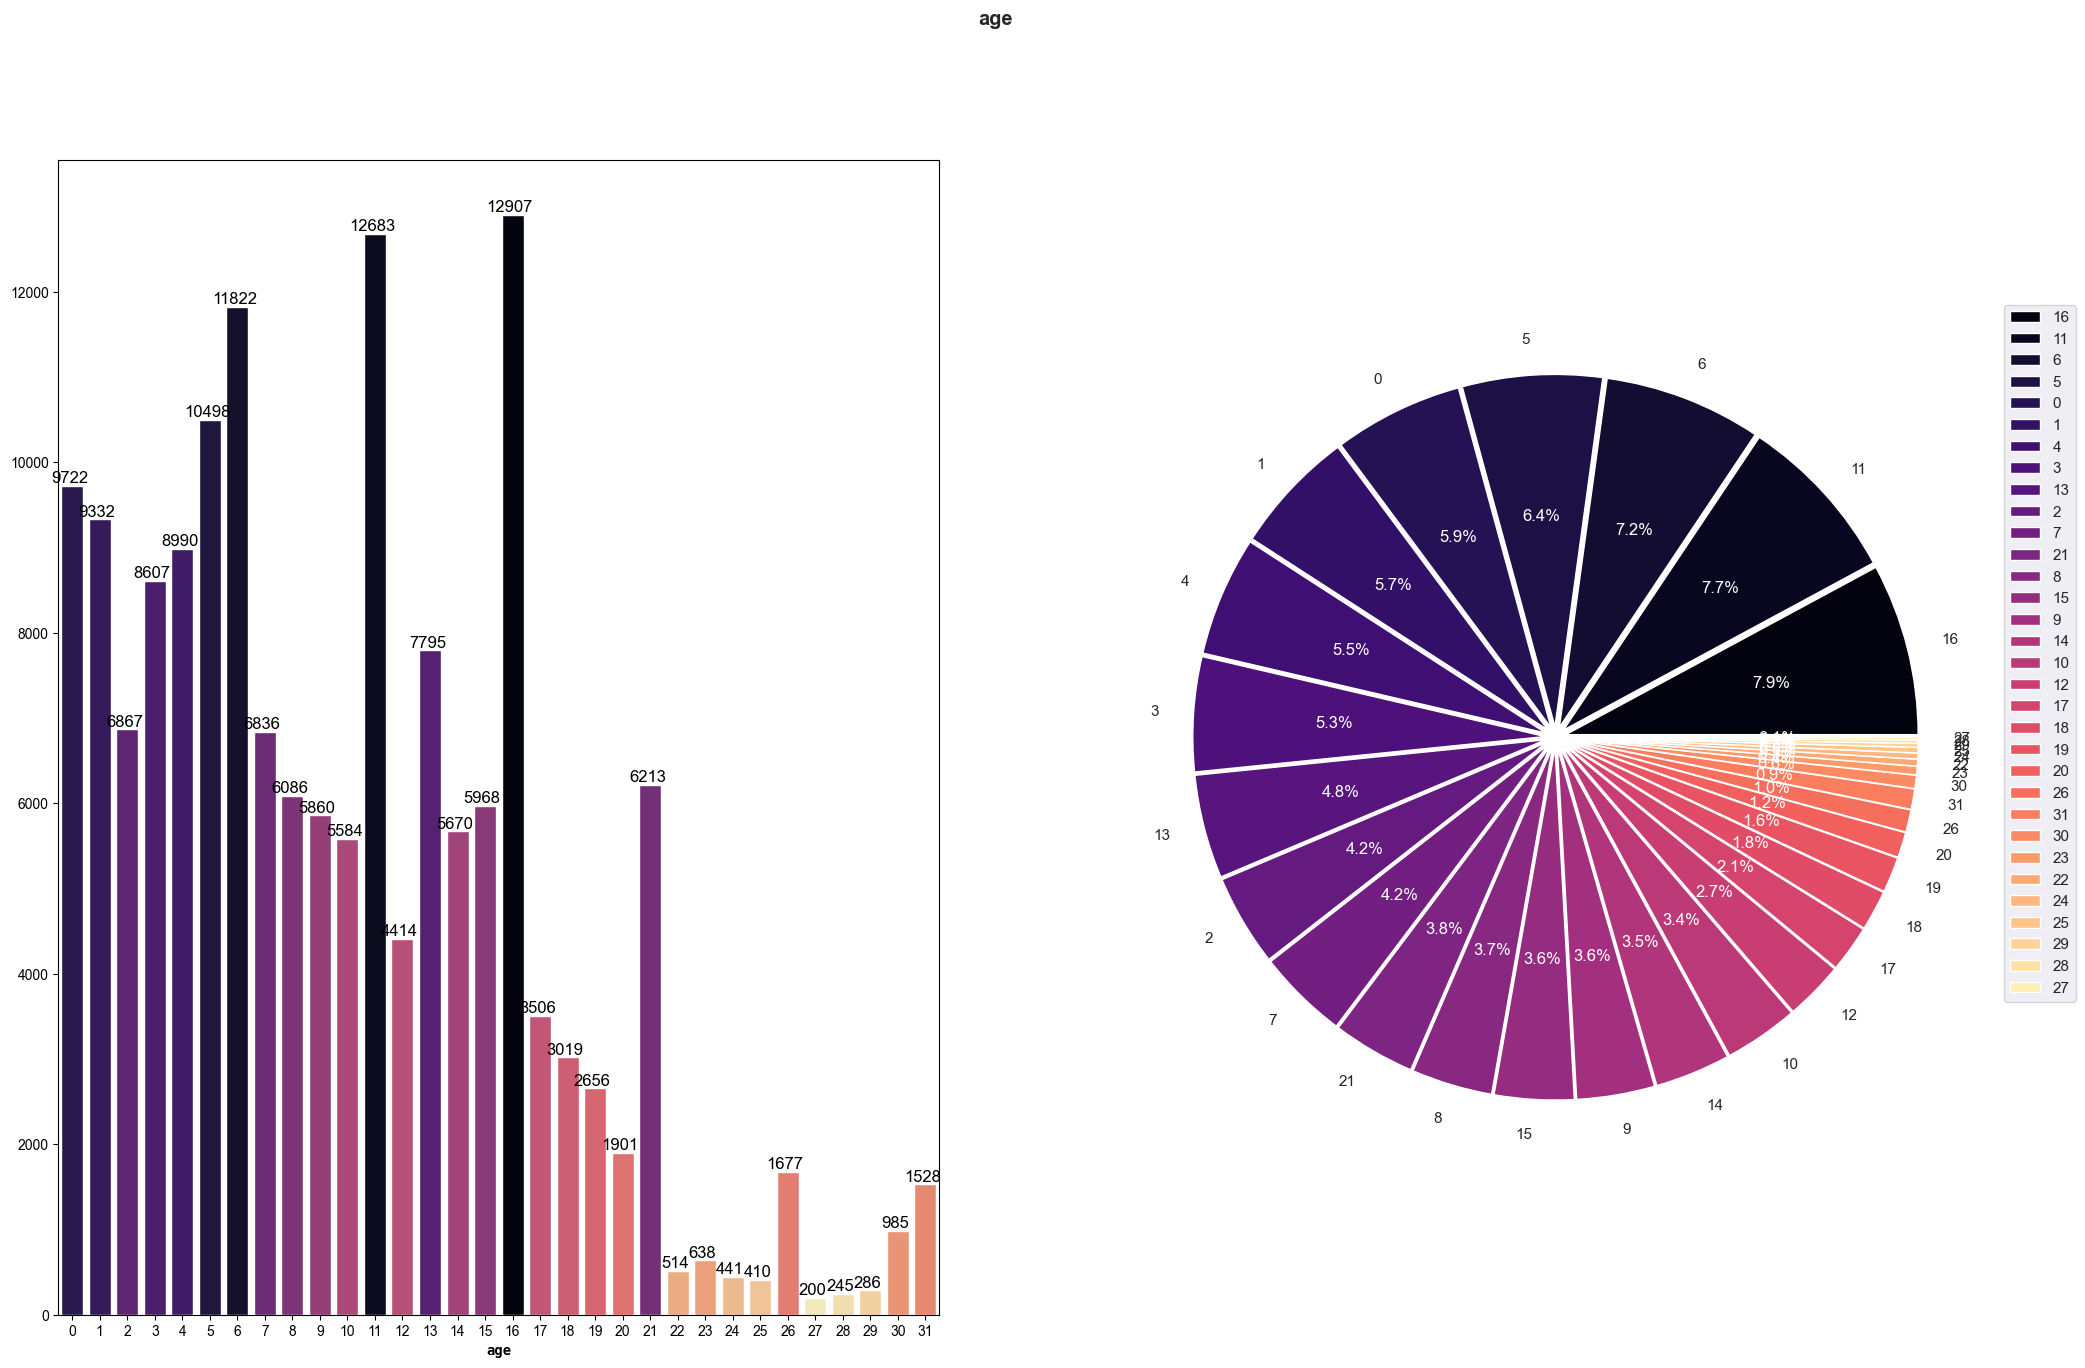

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(25,15))
x=df1['age'].value_counts().index
y=df1['age'].value_counts().values.tolist()
data = df1.groupby("age").size()
sns.set(style="dark", color_codes=True)
pal = sns.color_palette("magma", len(data))
rank = data.argsort().argsort() 
sns.barplot(x=x,y=y,palette=np.array(pal[::-1])[rank],ax = ax[0])
for p in ax[0].patches:
        ax[0].annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
ax[0].set_xlabel('age', weight='semibold', fontname = 'monospace')
_, _, autotexts= ax[1].pie(y, labels = x, colors = pal, autopct='%1.1f%%',
        explode=[0.03 for i in df1['age'].value_counts().index])
for autotext in autotexts:
    autotext.set_color('white')
plt.legend(bbox_to_anchor=(1, 1))
plt.suptitle ('age',weight = 'bold')
plt.show()

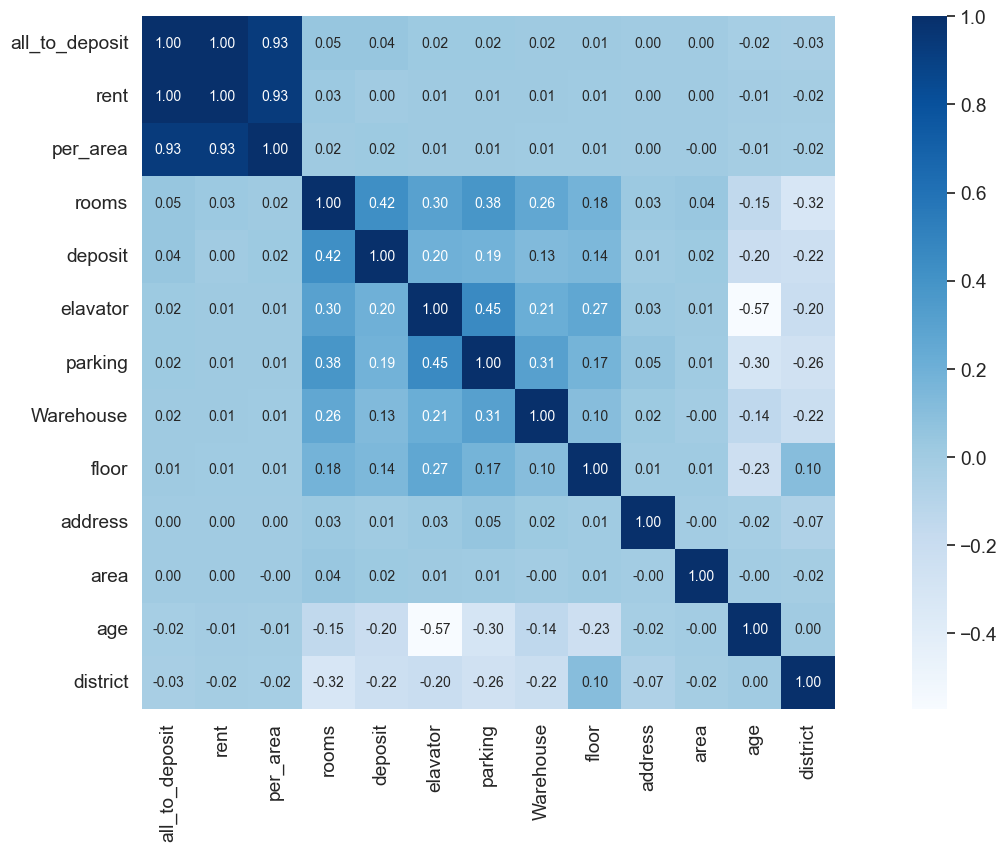

In [21]:
corr = df1.corr()
plt.figure(figsize=(20, 9))
k = 14 #number of variables for heatmap
cols = corr.nlargest(k, 'all_to_deposit')['all_to_deposit'].index
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values,cmap="Blues")
plt.show()

## Model Selection 

In [22]:
df2 = df1.copy()
df2=df2.drop(['rent','deposit'],axis=1)
y=df2.pop('all_to_deposit')
X=df2

In [39]:
df

,deposit,rent,floor,area,age,rooms,elavator,parking,Warehouse,time,region,all_to_deposit,district
0,320.0,0.0,1.0,55,7,1,1,1,0,1.657961e+09,استاد معین,320.0,9
1,300.0,0.1,3.0,45,13,1,0,1,1,1.657961e+09,آذربایجان,303.0,10
2,300.0,30.0,2.0,128,9,3,1,1,1,1.657961e+09,محمودیه,1300.0,1
3,600.0,18.0,8.0,132,16,2,1,1,1,1.657961e+09,فرمانیه,1200.0,1
4,200.0,11.0,2.0,105,7,2,1,1,1,1.657961e+09,شهران شمالی,566.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165113,1000.0,25.0,1.0,135,11,2,1,1,1,1.661164e+09,کامرانیه,1833.0,1
165114,2300.0,0.0,3.0,160,10,3,1,1,1,1.661164e+09,اقدسیه,2300.0,1
165115,350.0,0.0,3.0,92,30,2,0,0,1,1.661164e+09,زاهد گیلانی,350.0,13
165116,300.0,25.0,1.0,110,6,2,1,1,1,1.661164e+09,نیاوران,1133.0,1


In [40]:
df.to_csv('filsssse.csv', index=False ,encoding='utf-8-sig')


In [28]:
df.to_csv("clean_home_iranin.csv", index=False, encoding='utf8')

## Linear Regression:

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [24]:
regmodel=LinearRegression()
regmodel.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=regmodel.predict(X_test)

In [26]:
print('r2_score: ',metrics.r2_score(y_test,y_pred))
print('mean_squared_error: ',metrics.mean_squared_error(y_test,y_pred))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,y_pred))

r2_score:  0.8690985222995005
mean_squared_error:  66828792.73952046
mean_absolute_error:  698.1093145275905


## polynomial Linear Regression

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
poly=PolynomialFeatures(degree=2)
X_train_quad=poly.fit_transform(X_train)
X_test_quad=poly.fit_transform(X_test)
polymodel=LinearRegression()

In [29]:
polymodel.fit(X_train_quad,y_train)

LinearRegression()

In [30]:
y_pred_quad=polymodel.predict(X_test_quad)
y_pred2=y_pred_quad

In [31]:
print(y_pred_quad.shape)
print(y_test.shape)

(32772,)
(32772,)


In [32]:
print('r2_score: ',metrics.r2_score(y_test,y_pred_quad))
print('explained_variance_score: ',metrics.explained_variance_score(y_test,y_pred_quad))
print('mean_squared_error: ',metrics.mean_squared_error(y_test,y_pred_quad))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,y_pred_quad))

r2_score:  1.0
explained_variance_score:  1.0
mean_squared_error:  8.522016744967452e-19
mean_absolute_error:  2.8657236145775874e-10


Text(0, 0.5, 'y_pred')

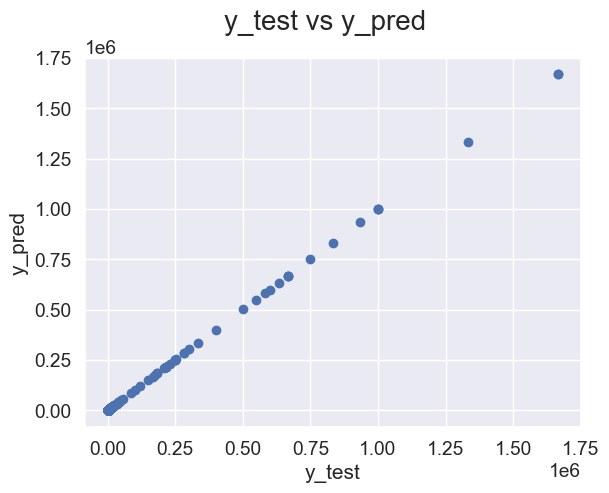

In [33]:
fig = plt.figure()
plt.scatter(y_test,y_pred_quad)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred') 

## Regression Decision Trees:

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

In [35]:
regression_tree_houses = DecisionTreeRegressor()
regression_tree_houses.fit(X_train, y_train)

DecisionTreeRegressor()

In [36]:
y_pred_tree = regression_tree_houses.predict(X_test)

In [37]:
print('r2_score: ',metrics.r2_score(y_test,y_pred_tree))
print('explained_variance_score: ',metrics.explained_variance_score(y_test,y_pred_tree))
print('mean_squared_error: ',metrics.mean_squared_error(y_test,y_pred_tree))
print('mean_absolute_error: ',metrics.mean_absolute_error(y_test,y_pred_tree))

r2_score:  0.9698857714758718
explained_variance_score:  0.969886053451345
mean_squared_error:  15354853.58444709
mean_absolute_error:  70.82962590015867


Text(0, 0.5, 'y_pred')

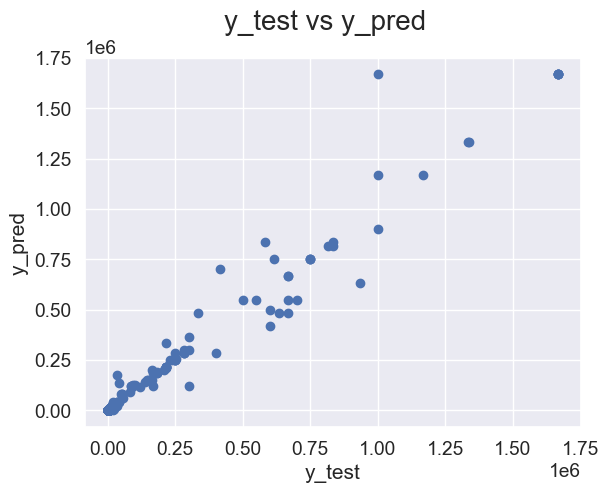

In [38]:
fig = plt.figure()
plt.scatter(y_test,y_pred_tree)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test')                          # X-label
plt.ylabel('y_pred')